## House Prices Data Visualization Project

>This data set contains information about house prices.  In  this project we explore the price of houses based on (3) criterias.  Neighborhood, style and price.  I will fous on what impact does the size, neighborhhod and style have on the over all price of the house.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [3]:
# high-level overview of data shape 
print(df.shape)


(6028, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   house_id      6028 non-null   int64 
 1   neighborhood  6028 non-null   object
 2   area          6028 non-null   int64 
 3   bedrooms      6028 non-null   int64 
 4   bathrooms     6028 non-null   int64 
 5   style         6028 non-null   object
 6   price         6028 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [5]:
df.describe()

,house_id,area,bedrooms,bathrooms,price
count,6028.000000,6028.000000,6028.000000,6028.000000,6.028000e+03
mean,4110.536828,2136.849038,3.717651,2.158261,7.542079e+05
std,2251.834665,1237.481101,1.704650,1.169621,5.236731e+05
min,200.000000,0.000000,0.000000,0.000000,1.216700e+04
25%,2167.500000,1225.000000,3.000000,2.000000,3.641350e+05
50%,4120.500000,1826.000000,4.000000,2.000000,6.357590e+05
75%,6070.250000,3129.000000,5.000000,3.000000,9.666752e+05
max,7999.000000,7447.000000,8.000000,5.000000,3.684602e+06


In [6]:
df.duplicated().sum()

0

#### Univariate Exploration
>In this section, I investigate distributions of individual variables.

###### Which Neigborhood has more houses?
- This graph gives a represenataion of the amount of houses in each neighborrhood.  Per the data we can see that neighborhhod b has the highest concentration of houses, and neighborhood c having the lowest.

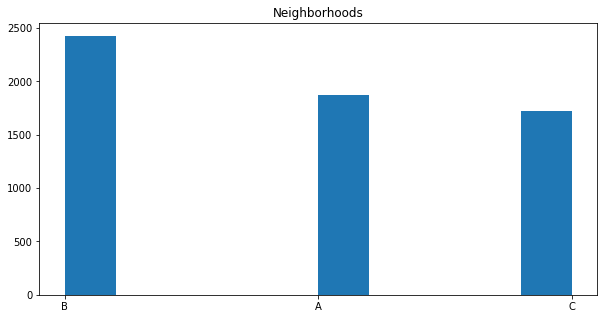

In [7]:
plt.figure(figsize = [10, 5])
plt.title('Neighborhoods')
plt.hist(data = df, x = 'neighborhood')
plt.show()

##### Which style of houses are more prevalent?
- We wanted to know which style of houses were more prevalent in our data set. As we see from the pie graph below half of the house in our data set are of Victorian style, with lodge style being the lowest on our data set.

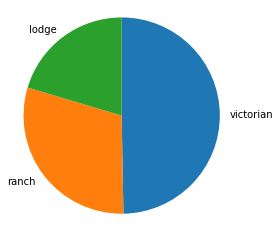

In [8]:
sorted_counts = df['style'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
plt.show()

###### What is the Price?
- This histogram shows that the highest price fall well above 35 millions, The data is left skewed, with more of the house prices falling between 

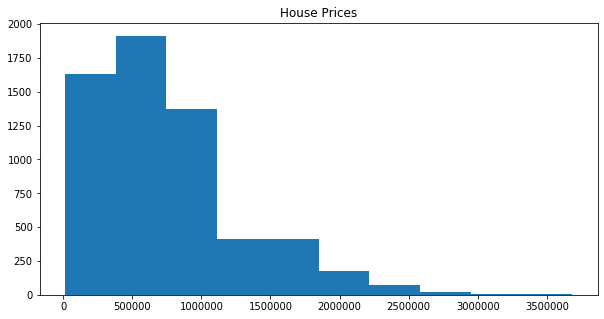

In [9]:
plt.figure(figsize = [10, 5])
plt.title('House Prices')
plt.hist(data = df, x = 'price')
plt.show()

##### The SQ FT breakdown
- Here we see that the most homes fall between 1000sqf and 4000sqf.  We will proceed in next slide to explorer the correlation between square footage and price.

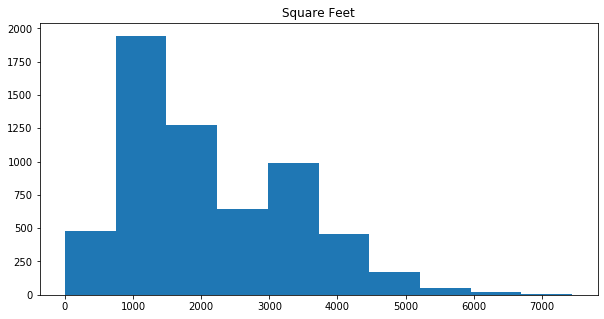

In [10]:
plt.figure(figsize = [10, 5])
plt.title('Square Feet')
bin_edges = np.arange(0, df['area'].max()+1, 1)
plt.hist(data = df, x = 'area')
plt.show()

### Bivariate Exploration
- This section  will investigate relationships between pairs of variables.

##### What is the correlation between the style of a home and the price?


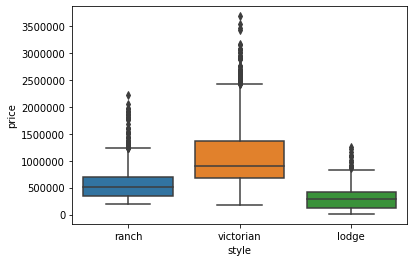

In [11]:
df = sb.boxplot(x="style", y="price", data=df)

- As we can see on the graph the Victorian style homes are the most expensive coming in at 3.5 mil or higher.  Ranch style homes top at 2.3mil, and the Lodge style homes toping out at 1.2 mil.  It seems that the style of a home has an great influence on the price. 

###### Neighborhood vs Price Analisys

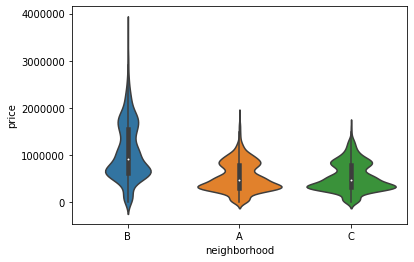

In [12]:
sb.violinplot(data = df, x = 'neighborhood', y = 'price')
plt.show()

- The findings here are very interesting.  It seems that Neighborhood B is the more desireble and expensive place to be.  House prices in Neighborhood B top at 4mil, while A and C have a difference of 500k.

##### Bedrooms vs Price

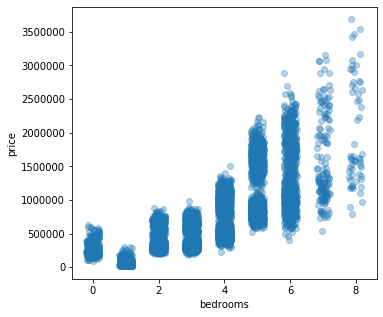

In [13]:
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'bedrooms', y = 'price', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.show()

- The graphs does show us that the higher the bedrook count in a house, the higher the price as I expected it to be.

#### Multivariate Exploration
- In this section I get to explore the data further by being able to use 3 variables to plot my graphs.

- This graph shows the correlation between style, number of bedrooms and the price of a house.  As we can see Victorian style homes are not only the more expensive, but also have the highest number of bedrooms. 

/Users/marlonfernandez/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


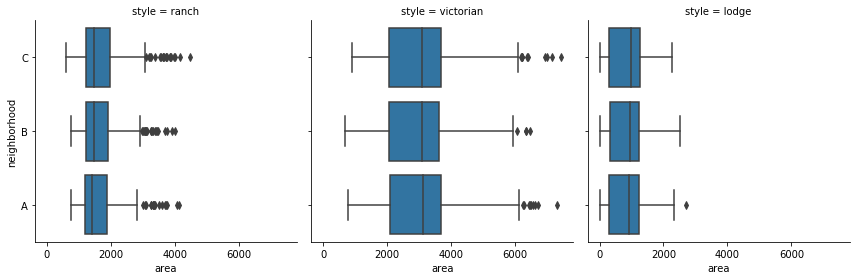

In [9]:
g = sb.FacetGrid(data = df, col = 'style', height = 4)
g.map(sb.boxplot, 'area', 'neighborhood')

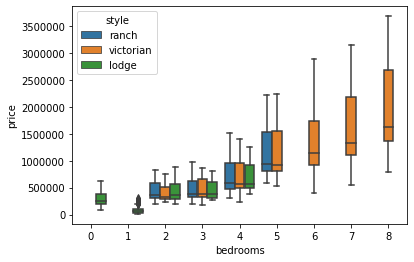

In [11]:
sb.boxplot(x='bedrooms', y='price', hue='style', data=df)
plt.show()

- From the boxplot we see that our research has been very consistent in showing that those homes that are bigger, have the highest prices as shown in other graphs.